# Pelota que cae

Las ecuaciones de Newton son:

$m \frac{d^2\vec r}{dt^2} = -g\hat k +\vec f_{friccion} + \vec f_{ext} $

In [18]:
from pylab import*
from scipy.integrate import*
%matplotlib inline

In [73]:
def fuerza(v_r,t, gamma=0, viento=[0,0], m=1.,g=9.8):
    # v_r = [r, rz, vy, vz]
    dvz = -g/m -gamma/m*v_r[3] +viento[1]
    dvy = 0 -gamma/m*v_r[2]+viento[0]
    drz = v_r[3]
    dry = v_r[2]
    return [dry, drz, dvy, dvz]

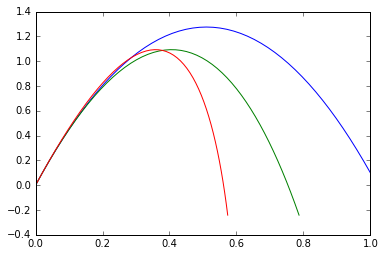

In [74]:
tiempo=linspace(0,1)
sol_0 =odeint(fuerza,[0,0,1,5],tiempo)
y0,z0 = sol_0[:,0],sol_0[:,1]
sol_1 =odeint(fuerza,[0,0,1,5],tiempo,args=(0.5,))
y1,z1 = sol_1[:,0], sol_1[:,1]
sol_2 =odeint(fuerza,[0,0,1,5],tiempo,args=(0.5,[-.5,0]))
y2,z2 = sol_2[:,0], sol_2[:,1]
#xlim([-1,1.1]),ylim([0,1.4]),grid(True)
plot(y0,z0, y1,z1, y2,z2)
show()

In [43]:
def delta_tray(r0, dt=0.1, param=[0, [0,0], 1, 9.8]):
    tiempo = array([0,dt])
    sol = odeint(fuerza, r0, tiempo, args=(param[0],param[1],param[2],param[3]))
    return sol

In [138]:
def rebote(pto, dt, param):
    error = 1e-5
    dt = dt/2
    sol =odeint(fuerza, pto, [0,dt], args=(param[0],param[1],param[2],param[3],))
    while abs(sol[:,1][0]-sol[:,1][1]) > error:
        if sol[:,1][0]*sol[:,1][1] < 0:
            pto = sol[0]
        else:
            pto = sol[1]
        dt = dt/2
        sol =odeint(fuerza, pto, [0,dt], args=(param[0],param[1],param[2],param[3],))
        #print sol[0]
    return [sol[0][0],sol[0][1],sol[0][2],-sol[0][3]]

In [135]:
rebote([0.6, 0.036, 1., -2.88], 0.05, [0,[0,0],1, 9.8])

[ 0.6    0.036  1.    -2.88 ]
[ 0.6    0.036  1.    -2.88 ]
[ 0.60625     0.01780859  1.         -2.94125   ]
[ 0.609375    0.00856934  1.         -2.971875  ]
[ 0.6109375   0.00391382  1.         -2.9871875 ]
[  6.11718750e-01   1.57708739e-03   1.00000000e+00  -2.99484375e+00]
[  6.12109375e-01   4.06478874e-04   1.00000000e+00  -2.99867188e+00]
[  6.12109375e-01   4.06478874e-04   1.00000000e+00  -2.99867188e+00]
[  6.12207031e-01   1.13593094e-04   1.00000000e+00  -2.99962891e+00]
[  6.12207031e-01   1.13593094e-04   1.00000000e+00  -2.99962891e+00]
[  6.12231445e-01   4.03570457e-05   1.00000000e+00  -2.99986816e+00]
[  6.12243652e-01   3.73683110e-06   1.00000000e+00  -2.99998779e+00]
[  6.12243652e-01   3.73683110e-06   1.00000000e+00  -2.99998779e+00]


[0.61224365234374989, 3.7368311003308554e-06, 1.0, 2.9999877929687497]

In [157]:
def trayec(r0, tf, param=[0, [0,0], 1, 9.8]):
    t_tot, dt =[0], .01
    y = [r0[0]]
    z = [r0[1]]
    t_actual = 0.
    while t_actual <= tf :
        t_actual = t_actual + dt
        sol =odeint(fuerza, r0, [0,dt], args=(param[0],param[1],param[2],param[3],))
        if sol[:,1][0]*sol[:,1][1] < 0.:
            sol1=rebote(sol[0],dt,param)
            y.append(sol1[0])
            z.append(sol1[1])
            r0=sol1
        else:
            y.append(sol[:,0][1])
            z.append(sol[:,1][1])
            r0 = sol[1]
        #print y,z
    return y,z

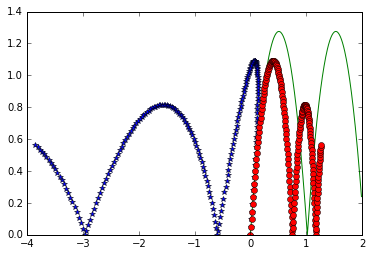

In [167]:
yv, zv = trayec([0,0,1,5],2., [.5,[-3.5,0],1, 9.8])
yf, zf = trayec([0,0,1,5],2., [.5,[0,0],1, 9.8])
yideal, zideal = trayec([0,0,1,5],2.)
plot(yv,zv,'*', yideal, zideal, yf,zf,'o')
show()

simular el rebote

In [11]:
def func1(x,y,otra_fun):
    x=out = otra_fun(x)+y
    return out

def func2(x):
    out = x**2
    return out
def func3(x):
    out = x**3
    return out

In [14]:
func1(4,8,func2)

24